In [14]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True,)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [15]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [16]:
y.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False, categories_dtype=object)

In [17]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
y = y.str.replace('"', '', regex=False)


In [19]:
X, y = fetch_openml('mnist_784', return_X_y=True)
y = y.astype(int)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  (Optional) Standardize data for models like SVM


In [20]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


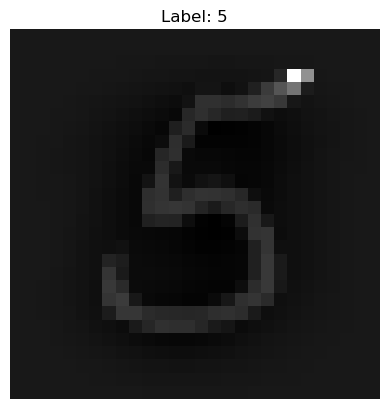

In [21]:
import matplotlib.pyplot as plt

# Reshape first sample back to 28x28
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


In [22]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [25]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
logreg.fit(X_train , y_train )


C:\Users\bbuser\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

# Support Vector Machine
svm_model = SVC(kernel='linear')  # linear kernel for simplicity

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [26]:
svm_model = SVC(kernel='linear')  # linear kernel for simplicity
svm_model.fit(X_train , y_train )
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))      

SVM Accuracy: 0.9210714285714285


In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train , y_train )
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt)) 

Decision Tree Accuracy: 0.8697142857142857


In [30]:
# Random Forest


In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train , y_train )
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)) 

Random Forest Accuracy: 0.9674285714285714


In [41]:
##  XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train , y_train )
y_pred_xgb = xgb_model.predict(X_test) 
models = [xgb_model]


c:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:52:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9780714285714286


In [37]:
model_names = ['XGBoost']

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print(classification_report(y_test, y_pred_xgb))


--- XGBoost ---
Accuracy: 0.9780714285714286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [35]:
models = [logreg, svm_model, dt_model, rf_model, xgb_model]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.9158571428571428
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.90      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

--- SVM ---
Accuracy: 0.9210714285714285
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.98 

In [ ]:
import numpy as np

# Convert to NumPy array
X_np = X.to_numpy()

# Flatten & normalize
X_np = X_np / 255.0  # normalize


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_np, y.to_numpy(), test_size=0.2, random_state=42
)


In [ ]:
X_train_norm = X_train.reshape(-1, 28*28) / 255.0
X_test_norm  = X_test.reshape(-1, 28*28) / 255.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# Normalization
X = X / 255.0   # before train/test split

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Shapes check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


In [ ]:
for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)   # X_test, not something else
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


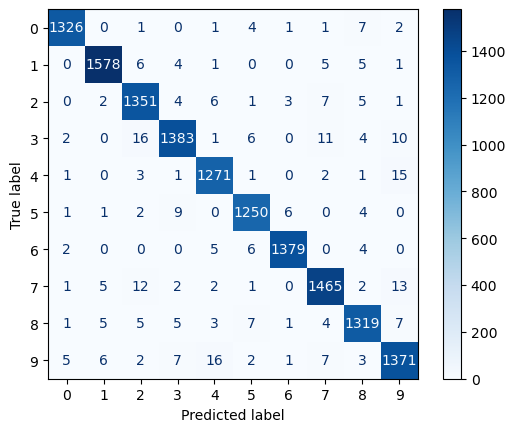

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [43]:
import numpy as np

misclassified = np.where(y_test != y_pred_xgb)[0]
print("Misclassified indices:", misclassified[:10])


Misclassified indices: [ 59 183 385 457 472 565 566 579 605 672]


In [44]:
for i in misclassified[:10]:
    print(f"Index: {i}, True: {y_test[i]}, Predicted: {y_pred[i]}")


KeyError: np.int64(59)

In [45]:
for i in misclassified[:10]:
    print(f"Index: {i}, True: {y_test.iloc[i]}, Predicted: {y_pred_xgb[i]}")


Index: 59, True: 9, Predicted: 8
Index: 183, True: 3, Predicted: 5
Index: 385, True: 2, Predicted: 4
Index: 457, True: 3, Predicted: 2
Index: 472, True: 5, Predicted: 3
Index: 565, True: 8, Predicted: 5
Index: 566, True: 8, Predicted: 4
Index: 579, True: 2, Predicted: 4
Index: 605, True: 3, Predicted: 7
Index: 672, True: 8, Predicted: 2


In [46]:
from sklearn.svm import SVC


In [54]:
misclassified_idx = np.where(y_pred_xgb != y_test)[0]  # indices of misclassified points
import pandas as pd

# Convert arrays to DataFrame/Series
X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)

# Now .iloc will work
X_mis = X_test.iloc[misclassified_idx]
y_mis = y_test.iloc[misclassified_idx]



svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_mis, y_mis)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [57]:
# Stage 1 prediction (using XGBoost)
y_pred_stage1 = model.predict(X_test)

# Find uncertain samples
uncertain_idx = np.where(model.predict_proba(X_test).max(axis=1) < 0.8)[0]

# Correct them with the second model
y_pred_stage2 = svm_model.predict(X_test.iloc[uncertain_idx])

# Final predictions
y_final = y_pred_stage1.copy()
y_final[uncertain_idx] = y_pred_stage2


In [58]:
from sklearn.metrics import accuracy_score

print("Stage 1 accuracy:", accuracy_score(y_test, y_pred))
print("Final combined accuracy:", accuracy_score(y_test, y_final))


Stage 1 accuracy: 0.9158571428571428
Final combined accuracy: 0.8713571428571428


In [ ]:
from sklearn.ensemble import StackingClassifier

final_model = StackingClassifier(
    estimators=[('xgb', model), ('svm', svm_model)],
    final_estimator=LogisticRegression()
)
final_model.fit(X_train, y_train)


C:\Users\bbuser\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
